## Make a plot of the mean absolute and geostrophic velocity from the 2020 and 2022 deployments

In [1]:
# Imports
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.geoaxes
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pandas as pd
import numpy as np
import glob
import datetime
import xarray as xr
import gsw
import cmocean.cm as cmo

myFmtshort = mdates.DateFormatter('%m/%d\n%H:%M')
myFmtlong = mdates.DateFormatter('%y/%m/%d\n%H:%M')
myFmt = mdates.DateFormatter('%m/%d/%y')

## Load data

In [2]:
## These were created in 04_Slocum_AD2CP_Analysis_RU29_2020.ipynb

geo_grid_2020 = xr.open_dataset("/home/jg1200/Data/GliderData/RU29/RU29_2020_AD2CP_NC/Gridded/RU29_2020_Gridded_Geostrophic_Velocity.nc")
abs_grid_2020 = xr.open_dataset("/home/jg1200/Data/GliderData/RU29/RU29_2020_AD2CP_NC/Gridded/RU29_2020_Gridded_ADCP_CTD.nc")

## These were created in RU36_2022_03_Mission_Transport_Calculations.ipynb and RU36_2022_03_Mission.ipynb
geo_grid_2022 = xr.open_dataset("/home/jg1200/Data/GliderData/RU36/RU36_03_2022_ADCP/RU36_03_2022_Gridded_Geostrophic_Velocity.nc")
abs_grid_2022 = xr.open_dataset("/home/jg1200/Data/GliderData/RU36/RU36_03_2022_ADCP/RU36_03_2022_Gridded_ADCP_CTD.nc")

depth_grid = np.repeat((abs_grid_2020.depth.values,),6,axis=0).transpose()


SA = gsw.SA_from_SP(np.nanmean(abs_grid_2020.sal.values,axis=2), depth_grid, -60, 20)
PT = gsw.pt0_from_t(SA, np.nanmean(abs_grid_2020.temp.values,axis=2), depth_grid)
SIGMA = gsw.sigma0(SA,PT)+1000

CT = gsw.CT_from_pt(SA, PT)

specvol_anom = gsw.specvol_anom_standard(SA, CT, depth_grid)



/tmp/ipykernel_31956/1474731099.py:13: RuntimeWarning: Mean of empty slice
  SA = gsw.SA_from_SP(np.nanmean(abs_grid_2020.sal.values,axis=2), depth_grid, -60, 20)
/tmp/ipykernel_31956/1474731099.py:14: RuntimeWarning: Mean of empty slice
  PT = gsw.pt0_from_t(SA, np.nanmean(abs_grid_2020.temp.values,axis=2), depth_grid)


In [3]:
geo_grid_2022

<xarray.Dataset>
Dimensions:       (depth: 501, lat: 4, transect_num: 6)
Coordinates:
  * depth         (depth) int64 0 2 4 6 8 10 12 ... 988 990 992 994 996 998 1000
  * lat           (lat) float64 17.8 17.9 18.0 18.1
  * transect_num  (transect_num) int64 1 2 3 4 5 6
Data variables:
    u             (depth, lat, transect_num) float64 ...
    density       (depth, lat, transect_num) float64 ...
    temp          (depth, lat, transect_num) float64 ...
    salinity      (depth, lat, transect_num) float64 ...
Attributes:
    description:  Processed RU36 Geostrophic Velocity and T/S/Density from th...

In [4]:
geo_grid_2020

<xarray.Dataset>
Dimensions:       (depth: 501, lat: 6, transect_num: 15)
Coordinates:
  * depth         (depth) int64 0 2 4 6 8 10 12 ... 988 990 992 994 996 998 1000
  * lat           (lat) float64 17.85 17.9 17.95 18.0 18.05 18.1
  * transect_num  (transect_num) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
Data variables:
    u             (depth, lat, transect_num) float64 ...
    density       (depth, lat, transect_num) float64 ...
    temp          (depth, lat, transect_num) float64 ...
    salinity      (depth, lat, transect_num) float64 ...
Attributes:
    description:  Processed RU29 Geostrophic Velocity and T/S/Density from th...

In [5]:
abs_grid_2020

<xarray.Dataset>
Dimensions:       (depth: 98, lat: 6, transect_num: 15)
Coordinates:
  * depth         (depth) float64 5.0 15.0 25.0 35.0 ... 945.0 955.0 965.0 975.0
  * lat           (lat) float64 17.85 17.9 17.95 18.0 18.05 18.1
  * transect_num  (transect_num) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
Data variables:
    u             (depth, lat, transect_num) float64 ...
    v             (depth, lat, transect_num) float64 ...
    temp          (depth, lat, transect_num) float64 29.4 29.24 ... nan nan
    sal           (depth, lat, transect_num) float64 34.99 34.91 ... nan nan
    density       (depth, lat, transect_num) float64 ...
    time          (lat, transect_num) datetime64[ns] ...
Attributes:
    description:  Processed RU29 AD2CP and CTD data from the 2020 Deployment....

In [6]:
geo_grid_2022

<xarray.Dataset>
Dimensions:       (depth: 501, lat: 4, transect_num: 6)
Coordinates:
  * depth         (depth) int64 0 2 4 6 8 10 12 ... 988 990 992 994 996 998 1000
  * lat           (lat) float64 17.8 17.9 18.0 18.1
  * transect_num  (transect_num) int64 1 2 3 4 5 6
Data variables:
    u             (depth, lat, transect_num) float64 0.1073 -0.2166 ... 0.05346
    density       (depth, lat, transect_num) float64 nan nan nan ... nan nan nan
    temp          (depth, lat, transect_num) float64 nan nan nan ... nan nan nan
    salinity      (depth, lat, transect_num) float64 nan nan nan ... nan nan nan
Attributes:
    description:  Processed RU36 Geostrophic Velocity and T/S/Density from th...

In [7]:
abs_grid_2022

<xarray.Dataset>
Dimensions:       (depth: 50, lat: 8, transect_num: 8)
Coordinates:
  * depth         (depth) float64 10.0 30.0 50.0 70.0 ... 950.0 970.0 990.0
  * lat           (lat) float64 17.8 17.85 17.9 17.95 18.0 18.05 18.1 18.15
  * transect_num  (transect_num) int64 1 2 3 4 5 6 7 8
Data variables:
    u             (depth, lat, transect_num) float64 ...
    v             (depth, lat, transect_num) float64 ...
    temp          (depth, lat, transect_num) float64 ...
    sal           (depth, lat, transect_num) float64 ...
    density       (depth, lat, transect_num) float64 ...
    time          (lat, transect_num) datetime64[ns] ...
Attributes:
    description:  Processed RU36 ADCP and CTD data from the March 2022 Deploy...

In [8]:
#### NEED TO SUBSET abs_grid_2022 to transects 2-7 like geo
abs_grid_2022 = abs_grid_2022.sel(transect_num=slice(2,7))
### This profile didn't get picked up by the QAQC for some reason
abs_grid_2022.u[:,5,0] = np.nan

abs_grid_2022

<xarray.Dataset>
Dimensions:       (depth: 50, lat: 8, transect_num: 6)
Coordinates:
  * depth         (depth) float64 10.0 30.0 50.0 70.0 ... 950.0 970.0 990.0
  * lat           (lat) float64 17.8 17.85 17.9 17.95 18.0 18.05 18.1 18.15
  * transect_num  (transect_num) int64 2 3 4 5 6 7
Data variables:
    u             (depth, lat, transect_num) float64 -0.1338 ... -0.003561
    v             (depth, lat, transect_num) float64 0.0118 ... -0.005751
    temp          (depth, lat, transect_num) float64 26.41 26.63 ... 5.594 5.699
    sal           (depth, lat, transect_num) float64 35.94 35.8 ... 34.93 34.91
    density       (depth, lat, transect_num) float64 1.024e+03 ... 1.032e+03
    time          (lat, transect_num) datetime64[ns] 2022-03-01T03:51:23 ... ...
Attributes:
    description:  Processed RU36 ADCP and CTD data from the March 2022 Deploy...

## Calculate mean and standard deviation of the 2020 and 2022 geostrophic and absolute velocity profiles

In [9]:
mean_geo_2020 = np.nanmean(geo_grid_2020.u,axis=(1,2))
std_geo_2020 = np.nanstd(geo_grid_2020.u,axis=(1,2))

mean_abs_2020 = np.nanmean(abs_grid_2020.u,axis=(1,2))
std_abs_2020 = np.nanstd(abs_grid_2020.u,axis=(1,2))

######################################################
mean_2021_a_df = pd.read_csv('/home/jg1200/Data/GliderData/RU29/mean_std_Vgeo_Vabs_depth_profile_jul_2021.csv')
mean_geo_2021_a = mean_2021_a_df.Vgeo_mean
std_geo_2021_a = mean_2021_a_df.Vgeo_std
mean_abs_2021_a = mean_2021_a_df.Vabs_mean
std_abs_2021_a = mean_2021_a_df.Vabs_std

######################################################
mean_2021_b_df = pd.read_csv('/home/jg1200/Data/GliderData/RU29/mean_std_Vgeo_Vabs_depth_profile_sep_2021.csv')
mean_geo_2021_b = mean_2021_b_df.Vgeo_mean
std_geo_2021_b = mean_2021_b_df.Vgeo_std
mean_abs_2021_b = mean_2021_b_df.Vabs_mean
std_abs_2021_b = mean_2021_b_df.Vabs_std


######################################################
mean_geo_2022 = np.nanmean(geo_grid_2022.u,axis=(1,2))
std_geo_2022 = np.nanstd(geo_grid_2022.u,axis=(1,2))

mean_abs_2022 = np.nanmean(abs_grid_2022.u,axis=(1,2))
std_abs_2022 = np.nanstd(abs_grid_2022.u,axis=(1,2))



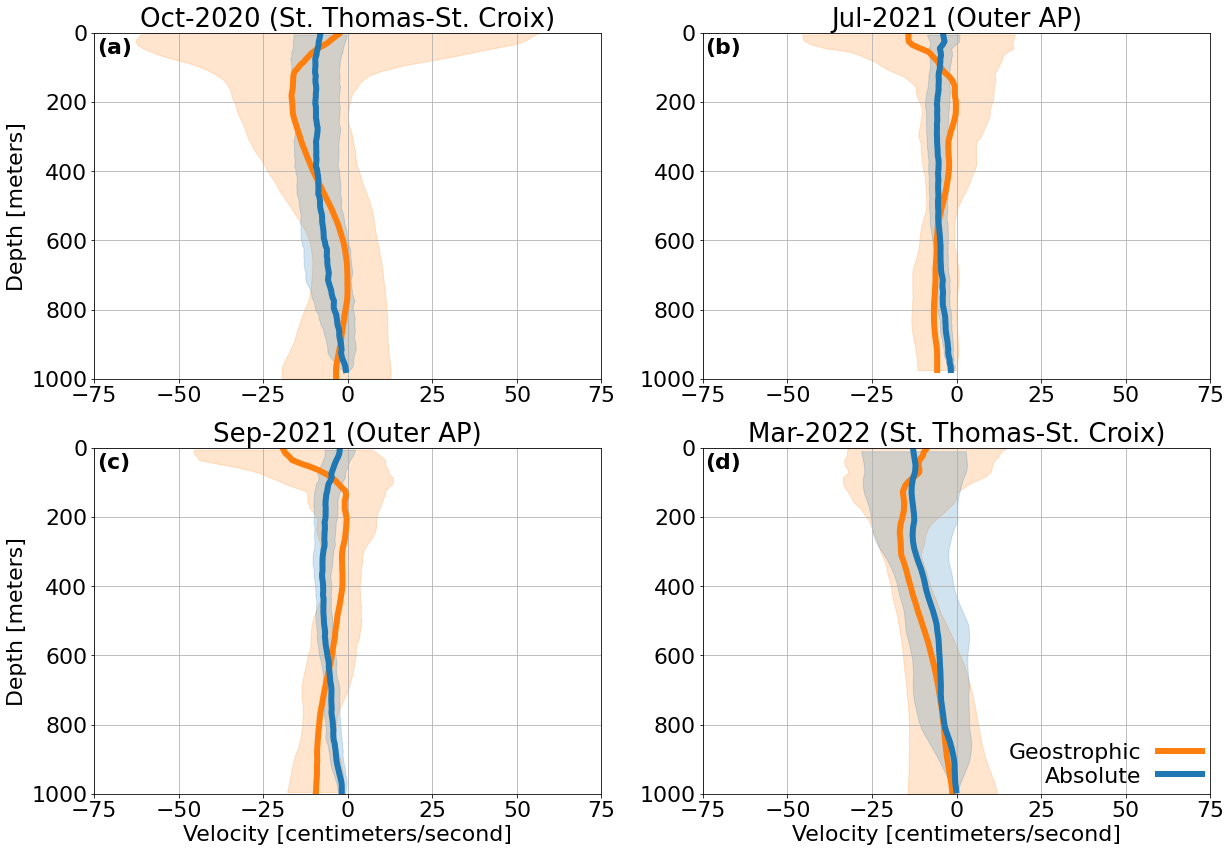

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(20, 14))

font_size=22
title_size=26

ymin = 1000
ymax = 0

xmin = -75
xmax = 75

line_width = 6

axs[0,0].plot(100*mean_geo_2020,geo_grid_2020.depth,label='Geostrophic',color='tab:orange',linewidth = line_width)
axs[0,0].fill_betweenx(geo_grid_2020.depth,100*mean_geo_2020,100*(mean_geo_2020+std_geo_2020),color='tab:orange',alpha=0.2)
axs[0,0].fill_betweenx(geo_grid_2020.depth,100*mean_geo_2020,100*(mean_geo_2020-std_geo_2020),color='tab:orange',alpha=0.2)
axs[0,0].plot(100*mean_abs_2020,abs_grid_2020.depth,label='Absolute',color='tab:blue',linewidth = line_width)
axs[0,0].fill_betweenx(abs_grid_2020.depth,100*mean_abs_2020,100*(mean_abs_2020+std_abs_2020),color='tab:blue',alpha=0.2)
axs[0,0].fill_betweenx(abs_grid_2020.depth,100*mean_abs_2020,100*(mean_abs_2020-std_abs_2020),color='tab:blue',alpha=0.2)
axs[0,0].grid()
axs[0,0].set_ylim(ymin,ymax)
axs[0,0].set_xlim(xmin,xmax)
#axs[0,0].set_xlabel('E/W Velocity [centimeters/second]', fontsize = font_size)
axs[0,0].set_ylabel('Depth [meters]', fontsize = font_size)
axs[0,0].set_title('Oct-2020 (St. Thomas-St. Croix)',fontsize=title_size)
axs[0,0].text(0.005,0.94,'(a)', transform=axs[0,0].transAxes, size=font_size, weight='bold')
axs[0,0].tick_params(axis='both', which='major', labelsize=font_size)
#axs[0,0].legend(loc='lower right',markerscale=4,frameon=False,markerfirst=False, fontsize=font_size, labelspacing=0.15,borderaxespad=-0.05)


axs[0,1].plot(100*mean_geo_2021_a,mean_2021_a_df.depth,label='Geostrophic',color='tab:orange',linewidth = line_width)
axs[0,1].fill_betweenx(mean_2021_a_df.depth,100*mean_geo_2021_a,100*(mean_geo_2021_a+std_geo_2021_a),color='tab:orange',alpha=0.2)
axs[0,1].fill_betweenx(mean_2021_a_df.depth,100*mean_geo_2021_a,100*(mean_geo_2021_a-std_geo_2021_a),color='tab:orange',alpha=0.2)
axs[0,1].plot(100*mean_abs_2021_a,mean_2021_a_df.depth,label='Absolute',color='tab:blue',linewidth = line_width)
axs[0,1].fill_betweenx(mean_2021_a_df.depth,100*mean_abs_2021_a,100*(mean_abs_2021_a+std_abs_2021_a),color='tab:blue',alpha=0.2)
axs[0,1].fill_betweenx(mean_2021_a_df.depth,100*mean_abs_2021_a,100*(mean_abs_2021_a-std_abs_2021_a),color='tab:blue',alpha=0.2)
axs[0,1].grid()
axs[0,1].set_ylim(ymin,ymax)
axs[0,1].set_xlim(xmin,xmax)
#axs[0,1].set_xlabel('Cross-Passage Velocity [centimeters/second]', fontsize = font_size)
#axs[0,1].set_ylabel('Depth [meters]', fontsize = font_size)
axs[0,1].set_title('Jul-2021 (Outer AP)',fontsize=title_size)
axs[0,1].text(0.005,0.94,'(b)', transform=axs[0,1].transAxes, size=font_size, weight='bold')
axs[0,1].tick_params(axis='both', which='major', labelsize=font_size)
#axs[0,1].legend(loc='lower right',markerscale=4,frameon=False,markerfirst=False, fontsize=font_size, labelspacing=0.15,borderaxespad=-0.05)

axs[1,0].plot(100*mean_geo_2021_b,mean_2021_b_df.depth,label='Geostrophic',color='tab:orange',linewidth = line_width)
axs[1,0].fill_betweenx(mean_2021_b_df.depth,100*mean_geo_2021_b,100*(mean_geo_2021_b+std_geo_2021_b),color='tab:orange',alpha=0.2)
axs[1,0].fill_betweenx(mean_2021_b_df.depth,100*mean_geo_2021_b,100*(mean_geo_2021_b-std_geo_2021_b),color='tab:orange',alpha=0.2)
axs[1,0].plot(100*mean_abs_2021_b,mean_2021_b_df.depth,label='Absolute',color='tab:blue',linewidth = line_width)
axs[1,0].fill_betweenx(mean_2021_b_df.depth,100*mean_abs_2021_b,100*(mean_abs_2021_b+std_abs_2021_b),color='tab:blue',alpha=0.2)
axs[1,0].fill_betweenx(mean_2021_b_df.depth,100*mean_abs_2021_b,100*(mean_abs_2021_b-std_abs_2021_b),color='tab:blue',alpha=0.2)
axs[1,0].grid()
axs[1,0].set_ylim(ymin,ymax)
axs[1,0].set_xlim(xmin,xmax)
axs[1,0].set_xlabel('Velocity [centimeters/second]', fontsize = font_size)
axs[1,0].set_ylabel('Depth [meters]', fontsize = font_size)
axs[1,0].set_title('Sep-2021 (Outer AP)',fontsize=title_size)
axs[1,0].text(0.005,0.94,'(c)', transform=axs[1,0].transAxes, size=font_size, weight='bold')
axs[1,0].tick_params(axis='both', which='major', labelsize=font_size)
#axs[1,0].legend(loc='lower right',markerscale=4,frameon=False,markerfirst=False, fontsize=font_size, labelspacing=0.15,borderaxespad=-0.05)

axs[1,1].plot(100*mean_geo_2022,geo_grid_2022.depth,label='Geostrophic',color='tab:orange',linewidth = line_width)
axs[1,1].fill_betweenx(geo_grid_2022.depth,100*mean_geo_2022,100*(mean_geo_2022+std_geo_2022),color='tab:orange',alpha=0.2)
axs[1,1].fill_betweenx(geo_grid_2022.depth,100*mean_geo_2022,100*(mean_geo_2022-std_geo_2022),color='tab:orange',alpha=0.2)
axs[1,1].plot(100*mean_abs_2022,abs_grid_2022.depth,label='Absolute',color='tab:blue',linewidth = line_width)
axs[1,1].fill_betweenx(abs_grid_2022.depth,100*mean_abs_2022,100*(mean_abs_2022+std_abs_2022),color='tab:blue',alpha=0.2)
axs[1,1].fill_betweenx(abs_grid_2022.depth,100*mean_abs_2022,100*(mean_abs_2022-std_abs_2022),color='tab:blue',alpha=0.2)
axs[1,1].grid()
axs[1,1].set_ylim(ymin,ymax)
axs[1,1].set_xlim(xmin,xmax)
axs[1,1].set_xlabel('Velocity [centimeters/second]', fontsize = font_size)
#axs[1,1].set_ylabel('Depth [meters]', fontsize = font_size)
axs[1,1].set_title('Mar-2022 (St. Thomas-St. Croix)',fontsize=title_size)
axs[1,1].text(0.005,0.94,'(d)', transform=axs[1,1].transAxes, size=font_size, weight='bold')
axs[1,1].tick_params(axis='both', which='major', labelsize=font_size)
axs[1,1].legend(loc='lower right',markerscale=4,frameon=False,markerfirst=False, fontsize=font_size, labelspacing=0.15,borderaxespad=-0.05)
    
plt.savefig('/home/jg1200/Figures/2020_2021_2022_Mean_STD_Velocity_Profile.png', bbox_inches='tight',dpi=300,facecolor='white')


## Plot 'er up!

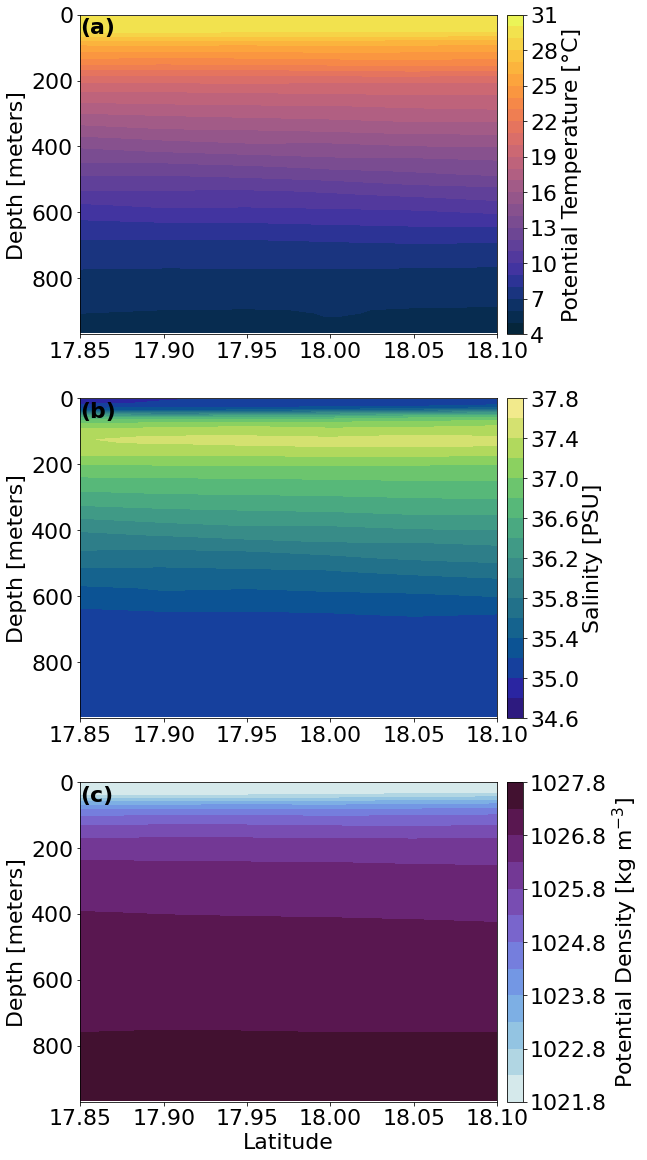

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(9, 20))

#fig.tight_layout(pad=8)

t_vmin=4
t_vmax=31
t_range= np.arange(t_vmin,t_vmax+0.5,1)

s_vmin=34.6
s_vmax=37.4
s_range= np.arange(s_vmin,s_vmax+0.5,0.2)

d_vmin=1021.8
d_vmax=1027.6
d_range= np.arange(d_vmin,d_vmax+0.5,0.5)

x_ticks = np.arange(17.85,18.11,0.05)
y_ticks = np.arange(0,1000,200)

font_size = 22

im = axs[0].contourf(abs_grid_2020.lat,abs_grid_2020.depth,PT,cmap=cmo.thermal,levels=t_range)
axs[0].set_xlim(17.85,18.1)
axs[0].set_ylim(970,0)
axs[0].set_xticks(x_ticks)
axs[0].set_yticks(y_ticks)
axs[0].set_ylabel('Depth [meters]',fontsize=font_size)
axs[0].tick_params(axis='both', which='major', labelsize=font_size)
axs[0].text(0,0.94,'(a)', transform=axs[0].transAxes, size=font_size, weight='bold')
clb = plt.colorbar(im, ax=axs[0],pad=0.02)
clb.ax.tick_params(labelsize=font_size) 
clb.set_label(label='Potential Temperature [°C]',fontsize=font_size)

im = axs[1].contourf(abs_grid_2020.lat,abs_grid_2020.depth,SA,cmap=cmo.haline,levels=s_range)
axs[1].set_xlim(17.85,18.1)
axs[1].set_ylim(970,0)
axs[1].set_xticks(x_ticks)
axs[1].set_yticks(y_ticks)
axs[1].set_ylabel('Depth [meters]',fontsize=font_size)
axs[1].tick_params(axis='both', which='major', labelsize=font_size)
axs[1].text(0,0.94,'(b)', transform=axs[1].transAxes, size=font_size, weight='bold')
clb = plt.colorbar(im, ax=axs[1],pad=0.02)
clb.ax.tick_params(labelsize=font_size) 
clb.set_label(label='Salinity [PSU]',fontsize=font_size)

im = axs[2].contourf(abs_grid_2020.lat,abs_grid_2020.depth,SIGMA,cmap=cmo.dense,levels=d_range)
axs[2].set_xlim(17.85,18.1)
axs[2].set_ylim(970,0)
axs[2].set_xticks(x_ticks)
axs[2].set_yticks(y_ticks)
axs[2].set_ylabel('Depth [meters]',fontsize=font_size)
axs[2].tick_params(axis='both', which='major', labelsize=font_size)
axs[2].set_xlabel('Latitude', fontsize=font_size)
axs[2].text(0,0.94,'(c)', transform=axs[2].transAxes, size=font_size, weight='bold')
clb = plt.colorbar(im, ax=axs[2],pad=0.02)
clb.ax.tick_params(labelsize=font_size) 
clb.set_label(label='Potential Density [kg m$^{-3}$]',fontsize=font_size)

plt.savefig('/home/jg1200/Figures/RU29_2020_Example_Transect_Temp_Salinty_Density.png', bbox_inches='tight',dpi=300,facecolor='white')


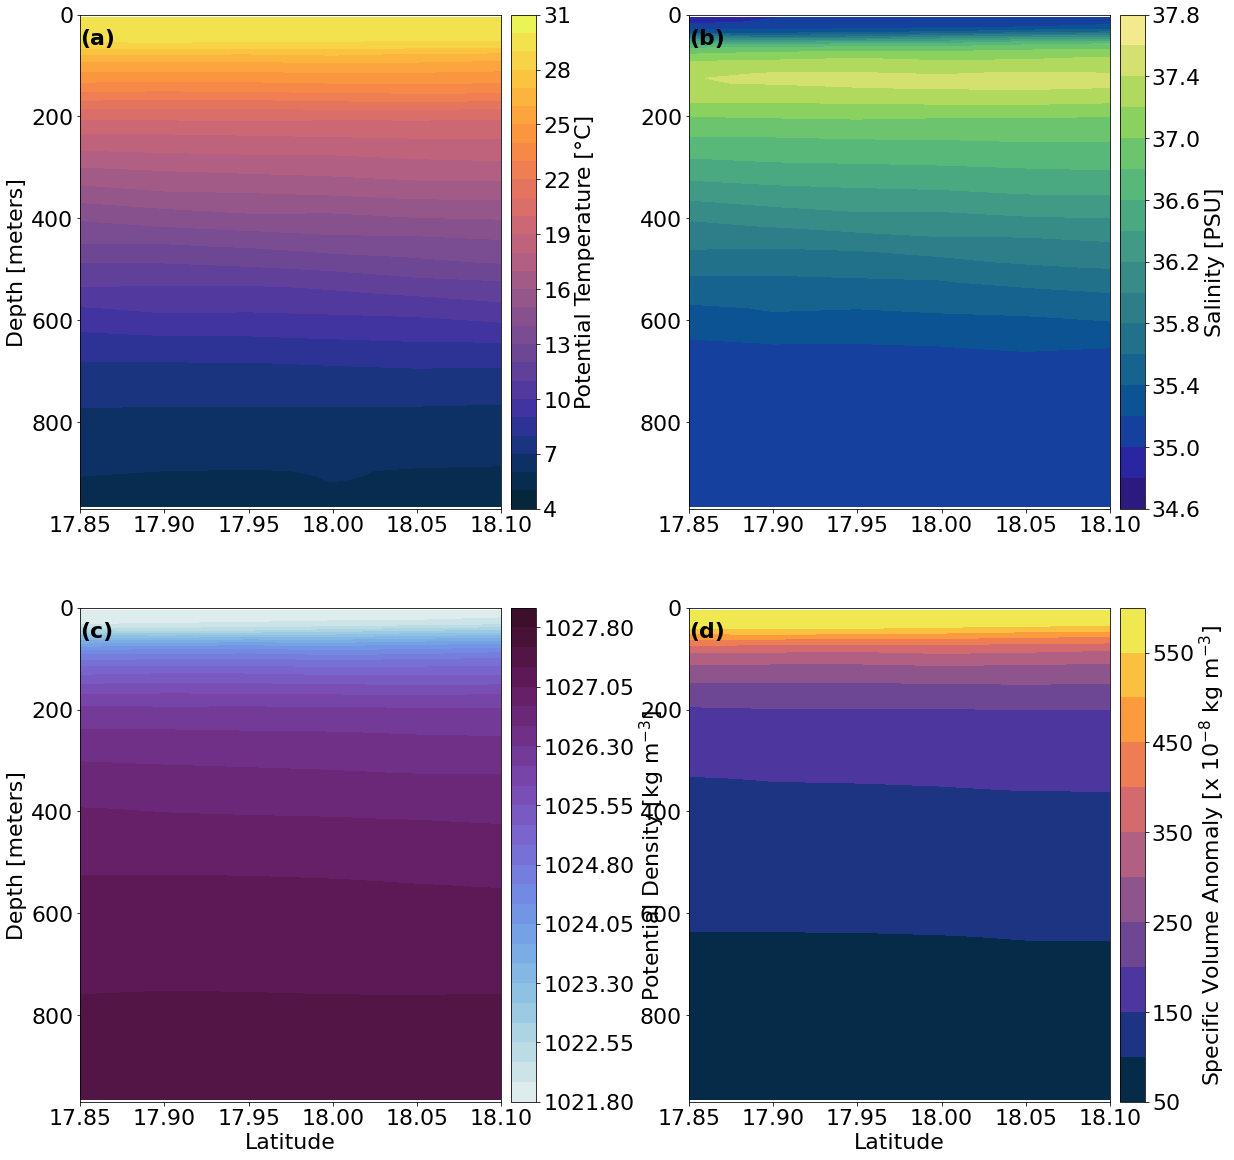

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(20, 20))

#fig.tight_layout(pad=8)

t_vmin=4
t_vmax=31
t_range= np.arange(t_vmin,t_vmax+0.5,1)

s_vmin=34.6
s_vmax=37.4
s_range= np.arange(s_vmin,s_vmax+0.5,0.2)

d_vmin=1021.8
d_vmax=1027.6
d_range= np.arange(d_vmin,d_vmax+0.5,0.25)

sv_vmin = 50
sv_vmax = 600
sv_range = np.arange(sv_vmin,sv_vmax+10,50)

x_ticks = np.arange(17.85,18.11,0.05)
y_ticks = np.arange(0,1000,200)

font_size = 22

im = axs[0,0].contourf(abs_grid_2020.lat,abs_grid_2020.depth,PT,cmap=cmo.thermal,levels=t_range)
axs[0,0].set_xlim(17.85,18.1)
axs[0,0].set_ylim(970,0)
axs[0,0].set_xticks(x_ticks)
axs[0,0].set_yticks(y_ticks)
axs[0,0].set_ylabel('Depth [meters]',fontsize=font_size)
axs[0,0].tick_params(axis='both', which='major', labelsize=font_size)
axs[0,0].text(0,0.94,'(a)', transform=axs[0,0].transAxes, size=font_size, weight='bold')
clb = plt.colorbar(im, ax=axs[0,0],pad=0.02)
clb.ax.tick_params(labelsize=font_size) 
clb.set_label(label='Potential Temperature [°C]',fontsize=font_size)

im = axs[0,1].contourf(abs_grid_2020.lat,abs_grid_2020.depth,SA,cmap=cmo.haline,levels=s_range)
axs[0,1].set_xlim(17.85,18.1)
axs[0,1].set_ylim(970,0)
axs[0,1].set_xticks(x_ticks)
axs[0,1].set_yticks(y_ticks)
#axs[0,1].set_ylabel('Depth [meters]',fontsize=font_size)
axs[0,1].tick_params(axis='both', which='major', labelsize=font_size)
axs[0,1].text(0,0.94,'(b)', transform=axs[0,1].transAxes, size=font_size, weight='bold')
clb = plt.colorbar(im, ax=axs[0,1],pad=0.02)
clb.ax.tick_params(labelsize=font_size) 
clb.set_label(label='Salinity [PSU]',fontsize=font_size)

im = axs[1,0].contourf(abs_grid_2020.lat,abs_grid_2020.depth,SIGMA,cmap=cmo.dense,levels=d_range)
axs[1,0].set_xlim(17.85,18.1)
axs[1,0].set_ylim(970,0)
axs[1,0].set_xticks(x_ticks)
axs[1,0].set_yticks(y_ticks)
axs[1,0].set_ylabel('Depth [meters]',fontsize=font_size)
axs[1,0].tick_params(axis='both', which='major', labelsize=font_size)
axs[1,0].set_xlabel('Latitude', fontsize=font_size)
axs[1,0].text(0,0.94,'(c)', transform=axs[1,0].transAxes, size=font_size, weight='bold')
clb = plt.colorbar(im, ax=axs[1,0],pad=0.02)
clb.ax.tick_params(labelsize=font_size) 
clb.set_label(label='Potential Density [kg m$^{-3}$]',fontsize=font_size)


im = axs[1,1].contourf(abs_grid_2020.lat,abs_grid_2020.depth,specvol_anom*(10**8),cmap=cmo.thermal,levels=sv_range)
axs[1,1].set_xlim(17.85,18.1)
axs[1,1].set_ylim(970,0)
axs[1,1].set_xticks(x_ticks)
axs[1,1].set_yticks(y_ticks)
#axs[1,1].set_ylabel('Depth [meters]',fontsize=font_size)
axs[1,1].tick_params(axis='both', which='major', labelsize=font_size)
axs[1,1].set_xlabel('Latitude', fontsize=font_size)
axs[1,1].text(0,0.94,'(d)', transform=axs[1,1].transAxes, size=font_size, weight='bold')
clb = plt.colorbar(im, ax=axs[1,1],pad=0.02)
clb.ax.tick_params(labelsize=font_size) 
clb.set_label(label='Specific Volume Anomaly [x 10$^{-8}$ kg m$^{-3}$]',fontsize=font_size)


#plt.savefig('/home/jg1200/Figures/RU29_2020_Example_Transect_Temp_Salinty_Density.png', bbox_inches='tight',dpi=300,facecolor='white')


## Add bathymetry

(17.65, 18.3)

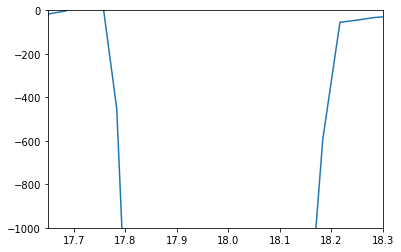

In [71]:
fname = 'https://gamone.whoi.edu/thredds/dodsC/usgs/data0/bathy/ETOPO2v2c_f4.nc'
ds_etpo = xr.open_dataset(fname)
lonind = np.nanargmin(np.abs(ds_etpo.x.values+64.8))
depth_slice = ds_etpo.sel(x=ds_etpo.x.values[lonind],y=slice(17.4, 18.8))   # 17.85,18.11
plt.plot(depth_slice.y,depth_slice.z)
plt.ylim((-1000,0))
plt.xlim((17.65,18.3))

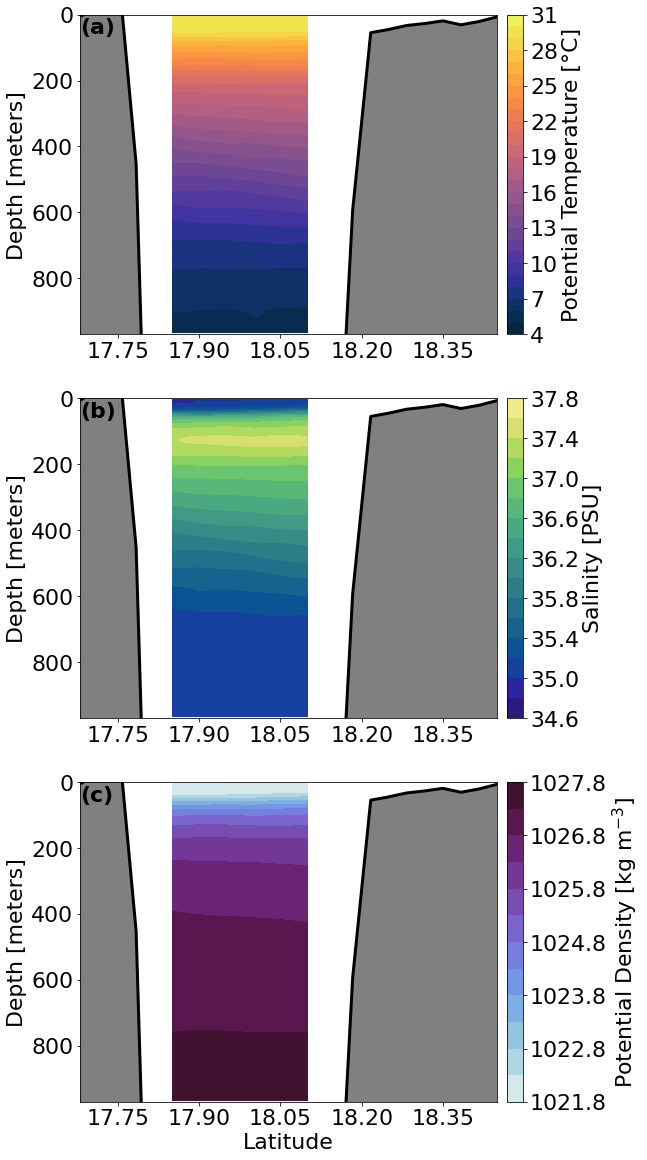

In [96]:
fig, axs = plt.subplots(3, 1, figsize=(9, 20))

#fig.tight_layout(pad=8)

t_vmin=4
t_vmax=31
t_range= np.arange(t_vmin,t_vmax+0.5,1)

s_vmin=34.6
s_vmax=37.4
s_range= np.arange(s_vmin,s_vmax+0.5,0.2)

d_vmin=1021.8
d_vmax=1027.6
d_range= np.arange(d_vmin,d_vmax+0.5,0.5)

x_ticks = np.arange(17.75,18.45,0.15)
y_ticks = np.arange(0,1000,200)

font_size = 22

im = axs[0].contourf(abs_grid_2020.lat,abs_grid_2020.depth,PT,cmap=cmo.thermal,levels=t_range)
axs[0].plot(depth_slice.y.values,-depth_slice.z,linewidth=3,color='black')
axs[0].fill_between(depth_slice.y.values,1000,-depth_slice.z.values,color='grey')

axs[0].set_xlim(17.68,18.45)
axs[0].set_ylim(970,0)
axs[0].set_xticks(x_ticks)
axs[0].set_yticks(y_ticks)
axs[0].set_ylabel('Depth [meters]',fontsize=font_size)
axs[0].tick_params(axis='both', which='major', labelsize=font_size)
axs[0].text(0,0.94,'(a)', transform=axs[0].transAxes, size=font_size, weight='bold')
clb = plt.colorbar(im, ax=axs[0],pad=0.02)
clb.ax.tick_params(labelsize=font_size) 
clb.set_label(label='Potential Temperature [°C]',fontsize=font_size)

im = axs[1].contourf(abs_grid_2020.lat,abs_grid_2020.depth,SA,cmap=cmo.haline,levels=s_range)
axs[1].plot(depth_slice.y.values,-depth_slice.z,linewidth=3,color='black')
axs[1].fill_between(depth_slice.y.values,1000,-depth_slice.z.values,color='grey')

axs[1].set_xlim(17.68,18.45)
axs[1].set_ylim(970,0)
axs[1].set_xticks(x_ticks)
axs[1].set_yticks(y_ticks)
axs[1].set_ylabel('Depth [meters]',fontsize=font_size)
axs[1].tick_params(axis='both', which='major', labelsize=font_size)
axs[1].text(0,0.94,'(b)', transform=axs[1].transAxes, size=font_size, weight='bold')
clb = plt.colorbar(im, ax=axs[1],pad=0.02)
clb.ax.tick_params(labelsize=font_size) 
clb.set_label(label='Salinity [PSU]',fontsize=font_size)

im = axs[2].contourf(abs_grid_2020.lat,abs_grid_2020.depth,SIGMA,cmap=cmo.dense,levels=d_range)
axs[2].plot(depth_slice.y.values,-depth_slice.z,linewidth=3,color='black')
axs[2].fill_between(depth_slice.y.values,1000,-depth_slice.z.values,color='grey')
axs[2].set_xlim(17.68,18.45)
axs[2].set_ylim(970,0)
axs[2].set_xticks(x_ticks)
axs[2].set_yticks(y_ticks)
axs[2].set_ylabel('Depth [meters]',fontsize=font_size)
axs[2].tick_params(axis='both', which='major', labelsize=font_size)
axs[2].set_xlabel('Latitude', fontsize=font_size)
axs[2].text(0,0.94,'(c)', transform=axs[2].transAxes, size=font_size, weight='bold')
clb = plt.colorbar(im, ax=axs[2],pad=0.02)
clb.ax.tick_params(labelsize=font_size) 
clb.set_label(label='Potential Density [kg m$^{-3}$]',fontsize=font_size)


plt.savefig('/home/jg1200/Figures/RU29_2020_Example_Transect_Temp_Salinty_Density_Bathymetry.png', bbox_inches='tight',dpi=300,facecolor='white')


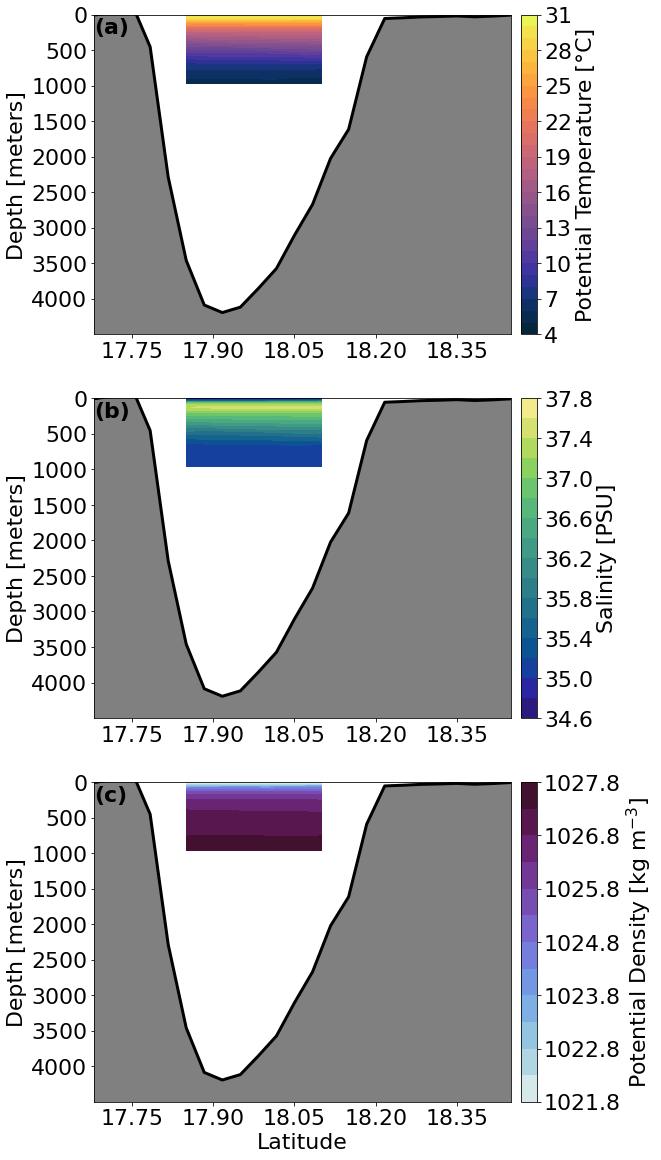

In [97]:
fig, axs = plt.subplots(3, 1, figsize=(9, 20))

#fig.tight_layout(pad=8)

t_vmin=4
t_vmax=31
t_range= np.arange(t_vmin,t_vmax+0.5,1)

s_vmin=34.6
s_vmax=37.4
s_range= np.arange(s_vmin,s_vmax+0.5,0.2)

d_vmin=1021.8
d_vmax=1027.6
d_range= np.arange(d_vmin,d_vmax+0.5,0.5)

x_ticks = np.arange(17.75,18.45,0.15)
y_ticks = np.arange(0,4500,500)

font_size = 22

im = axs[0].contourf(abs_grid_2020.lat,abs_grid_2020.depth,PT,cmap=cmo.thermal,levels=t_range)
axs[0].plot(depth_slice.y.values,-depth_slice.z,linewidth=3,color='black')
axs[0].fill_between(depth_slice.y.values,6000,-depth_slice.z.values,color='grey')

axs[0].set_xlim(17.68,18.45)
axs[0].set_ylim(4500,0)
axs[0].set_xticks(x_ticks)
axs[0].set_yticks(y_ticks)
axs[0].set_ylabel('Depth [meters]',fontsize=font_size)
axs[0].tick_params(axis='both', which='major', labelsize=font_size)
axs[0].text(0,0.94,'(a)', transform=axs[0].transAxes, size=font_size, weight='bold')
clb = plt.colorbar(im, ax=axs[0],pad=0.02)
clb.ax.tick_params(labelsize=font_size) 
clb.set_label(label='Potential Temperature [°C]',fontsize=font_size)

im = axs[1].contourf(abs_grid_2020.lat,abs_grid_2020.depth,SA,cmap=cmo.haline,levels=s_range)
axs[1].plot(depth_slice.y.values,-depth_slice.z,linewidth=3,color='black')
axs[1].fill_between(depth_slice.y.values,6000,-depth_slice.z.values,color='grey')

axs[1].set_xlim(17.68,18.45)
axs[1].set_ylim(4500,0)
axs[1].set_xticks(x_ticks)
axs[1].set_yticks(y_ticks)
axs[1].set_ylabel('Depth [meters]',fontsize=font_size)
axs[1].tick_params(axis='both', which='major', labelsize=font_size)
axs[1].text(0,0.94,'(b)', transform=axs[1].transAxes, size=font_size, weight='bold')
clb = plt.colorbar(im, ax=axs[1],pad=0.02)
clb.ax.tick_params(labelsize=font_size) 
clb.set_label(label='Salinity [PSU]',fontsize=font_size)

im = axs[2].contourf(abs_grid_2020.lat,abs_grid_2020.depth,SIGMA,cmap=cmo.dense,levels=d_range)
axs[2].plot(depth_slice.y.values,-depth_slice.z,linewidth=3,color='black')
axs[2].fill_between(depth_slice.y.values,6000,-depth_slice.z.values,color='grey')
axs[2].set_xlim(17.68,18.45)
axs[2].set_ylim(4500,0)
axs[2].set_xticks(x_ticks)
axs[2].set_yticks(y_ticks)
axs[2].set_ylabel('Depth [meters]',fontsize=font_size)
axs[2].tick_params(axis='both', which='major', labelsize=font_size)
axs[2].set_xlabel('Latitude', fontsize=font_size)
axs[2].text(0,0.94,'(c)', transform=axs[2].transAxes, size=font_size, weight='bold')
clb = plt.colorbar(im, ax=axs[2],pad=0.02)
clb.ax.tick_params(labelsize=font_size) 
clb.set_label(label='Potential Density [kg m$^{-3}$]',fontsize=font_size)


plt.savefig('/home/jg1200/Figures/RU29_2020_Example_Transect_Temp_Salinty_Density_Bathymetry_Deep.png', bbox_inches='tight',dpi=300,facecolor='white')
